1) Import the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

2) Read the data as a data frame and check info

In [2]:
insurance_data = pd.read_csv('C:\\Users\\User\\Desktop\\Greatlakes notes\\Statistical Learning Project\\insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3) Perform basic EDA 

###### a. Shape of the data

In [5]:
insurance_data.shape

(1338, 7)

###### b. Data type of each attribute

In [6]:
insurance_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

###### c. Checking the presence of missing values

In [7]:
insurance_data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [8]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### d. 5 point summary of numerical attributes

In [9]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

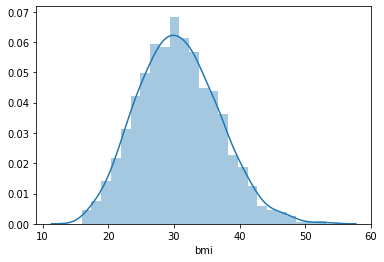

In [10]:
sns.distplot(insurance_data['bmi'])

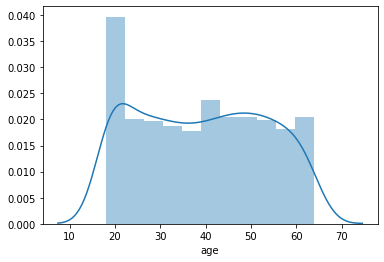

In [11]:
sns.distplot(insurance_data['age'])

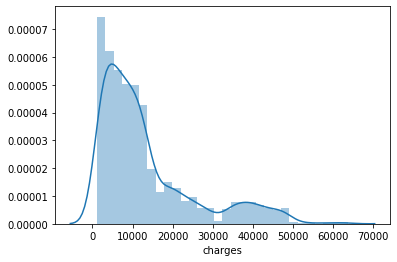

In [12]:
sns.distplot(insurance_data['charges'])

###### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [13]:
print(insurance_data['bmi'].skew())

0.2840471105987448


In [14]:
# As the value of the skewness is between -0.5 and 0.5, the distribution is approximately symmetric

In [15]:
print(insurance_data['age'].skew())

0.05567251565299186


In [16]:
# As the value of the skewness is between -0.5 and 0.5, the distribution is approximately symmetric

In [17]:
print(insurance_data['charges'].skew())

1.5158796580240388


In [18]:
# As the value of the skewness is positive and more than +1 therefore the 'charges' column is right skewed  

###### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

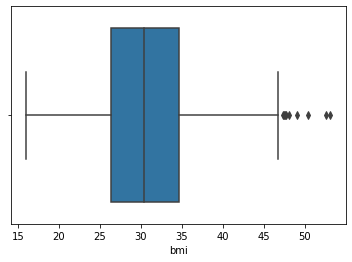

In [19]:
sns.boxplot(insurance_data['bmi'])

In [20]:
# Looking at the above box plot it can be concluded that 'bmi' column has outliers

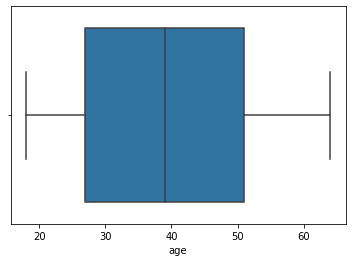

In [21]:
sns.boxplot(insurance_data['age'])

In [22]:
# Looking at the above box plot it can be concluded that 'age' column doesn't have any outliers

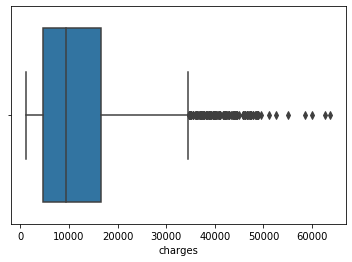

In [23]:
sns.boxplot(insurance_data['charges'])

In [24]:
# Looking at the above box plot it can be concluded that 'charges' column has outliers

##### h. Distribution of categorical columns (include children)

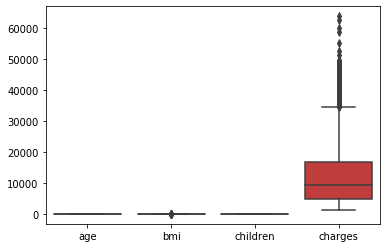

In [25]:
sns.boxplot(data=insurance_data)

###### i. Pair plot that includes all the columns of the data frame

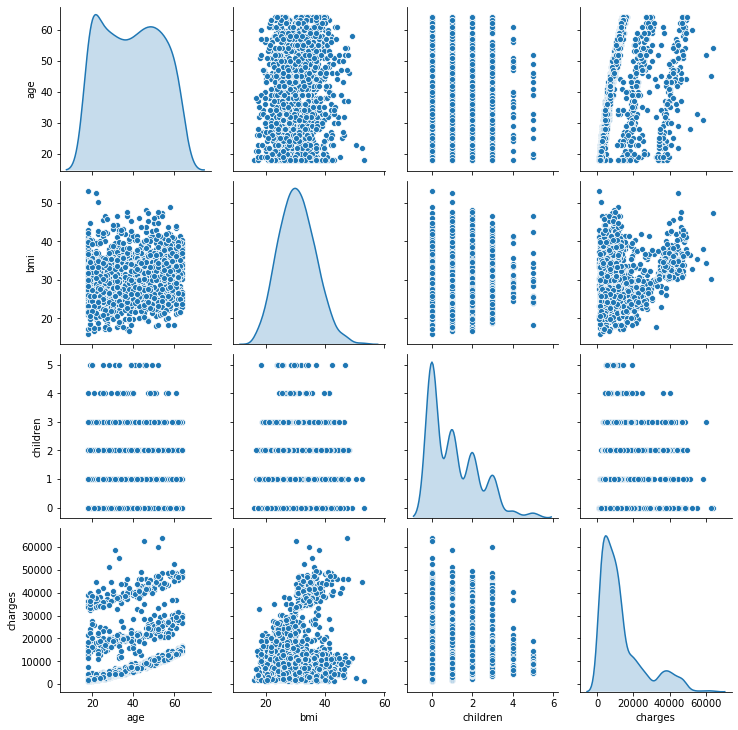

In [26]:
sns.pairplot(insurance_data,diag_kind='kde')

##### 4 a. Do charges of people who smoke differ significantly from the people who don't?

In [27]:
Ho = "charges of people who smoke are same as the people who don't"
Ha = "charges of people who smoke are not same as the people who don't"

In [28]:
smoker_d= insurance_data[insurance_data['smoker'] == 'yes']
nonsmoker_d= insurance_data[insurance_data['smoker'] == 'no']
charge_smoker= smoker_d['charges']
charge_nonsmoker= nonsmoker_d['charges']
print('Charges of people who smoke',charge_smoker)
print("Charges of people who don't smoke",charge_nonsmoker)

Charges of people who smoke 0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64
Charges of people who don't smoke 1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


In [29]:
t_stat, p_val = ttest_ind(charge_smoker,charge_nonsmoker)
print('stat=',t_stat,'p =', p_val)
if p_val < 0.05:
    print("Null hypothesis is rejected so", Ha)
else: 
    print("Null hypothesis is accepted so",Ho)

stat= 46.664921172723716 p = 8.271435842177219e-283
Null hypothesis is rejected so charges of people who smoke are not same as the people who don't


##### b. Does bmi of males differ significantly from that of females?

In [30]:
Ho_1 = "bmi of males are same as females"
Ha_1 = "bmi of males are different from females"

In [42]:
male = insurance_data[insurance_data['sex'] == 'male']
female = insurance_data[insurance_data['sex'] == 'female']
bmi_m= male['bmi']
bmi_f= female['bmi']
print('bmi of male',bmi_m)
print('bmi of female',bmi_f)

bmi of male 1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64
bmi of female 0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64


In [32]:
t_stats, p_valu = ttest_ind(bmi_m,bmi_f)
print('stat=',t_stats,'p =', p_valu)
if p_valu < 0.05:
    print("Null hypothesis is rejected so", Ha_1)
else: 
    print("Null hypothesis is accepted so",Ho_1)

stat= 1.696752635752224 p = 0.08997637178984932
Null hypothesis is accepted so bmi of males are same as females


##### c. Is the proportion of smokers significantly different in different genders?

In [33]:
Ho_2 = "proportion of smokers same in different genders"
Ha_2 = "proportion of smokers different in different genders"

In [34]:
dataset_table=pd.crosstab(insurance_data['sex'], insurance_data['smoker'])
print(dataset_table)

smoker   no  yes
sex             
female  547  115
male    517  159


In [35]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dataset_table)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))
if p_value < 0.05:
    print("Null hypothesis is rejected so", Ha_2)
else: 
    print("Null hypothesis is accepted so",Ho_2)

Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1
Null hypothesis is rejected so proportion of smokers different in different genders


##### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [36]:
Ho_3 = "distribution of bmi across women with no children, one child and two children are the same"
Ha_3 = "distribution of bmi across women with no children, one child and two children are different"

In [47]:
insurance_data_new = insurance_data[insurance_data['children'] < 3]

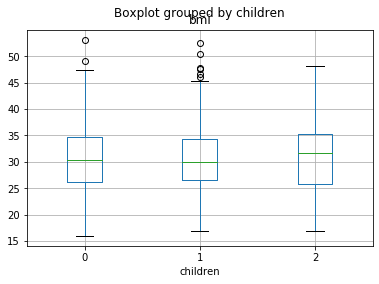

In [48]:
insurance_data_new.boxplot('bmi', by='children' )

In [49]:
mod = ols('bmi ~ children', data = insurance_data_new).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df         F    PR(>F)
children     27.272296     1.0  0.719586  0.396458
Residual  43054.351120  1136.0       NaN       NaN


In [51]:
# P Value = 0.396458
# Since the P value is more than 0.05 therefore we failed to reject Null Hypothesis
# Hence we can say that distribution of bmi across women with no children, one child and two children are the same